In [39]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report


In [40]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [41]:
dirt = "C:/Users/Xing/Desktop/ML/D3/"
adult = pd.read_csv(dirt + 'adult.csv')

In [42]:
adult.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [43]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [44]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [45]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [46]:
adult.dropna(inplace=True)
adult['workclass']=adult['workclass'].astype('category')
adult['education']=adult['education'].astype('category')
adult['marital-status']=adult['marital-status'].astype('category')
adult['occupation']=adult['occupation'].astype('category')
adult['relationship']=adult['relationship'].astype('category')
adult['race']=adult['race'].astype('category')
adult['sex']=adult['sex'].astype('category')
adult['native-country']=adult['native-country'].astype('category')
adult['income']=adult['income'].astype('category')

In [47]:
adult.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
dtype: object

In [48]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [49]:
adult.shape

(32561, 15)

In [50]:
Xcols=['workclass','education','marital-status','occupation','relationship','race','sex','native-country','age',
      'fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
Ycol = ['income']
Xcols=adult[Xcols]
Xcols=pd.get_dummies(Xcols)
Xcols.dtypes


age                                           int64
fnlwgt                                        int64
education-num                                 int64
capital-gain                                  int64
capital-loss                                  int64
hours-per-week                                int64
workclass_ ?                                  uint8
workclass_ Federal-gov                        uint8
workclass_ Local-gov                          uint8
workclass_ Never-worked                       uint8
workclass_ Private                            uint8
workclass_ Self-emp-inc                       uint8
workclass_ Self-emp-not-inc                   uint8
workclass_ State-gov                          uint8
workclass_ Without-pay                        uint8
education_ 10th                               uint8
education_ 11th                               uint8
education_ 12th                               uint8
education_ 1st-4th                            uint8
education_ 5

In [51]:
Y=adult[Ycol]

In [52]:
X = pd.concat([Xcols], axis=1)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [54]:
feature_names=X.columns
print (feature_names)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=108)


In [97]:
from sklearn import metrics
adult_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=5)
adult_tree.fit(X_train, Y_train)
predictions = adult_tree.predict(X_test)
print(metrics.confusion_matrix(Y_test, predictions))
print("Accuracy Score =", metrics.accuracy_score(Y_test, predictions))


#adult_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=5)

[[5847  299]
 [ 969 1026]]
Accuracy Score = 0.8442451787249724


In [98]:
###### 10-fold cross-validation ###################
from sklearn.model_selection import cross_val_score
cross_val_score(adult_tree, X_train, Y_train, cv=5, scoring = "accuracy")


array([0.84585466, 0.84438984, 0.84295659, 0.84131859, 0.84353881])

In [99]:
from sklearn.tree import export_graphviz

## Decision Tree Visualization
export_graphviz(
   adult_tree,
   out_file=dirt+"tree_income.dot",
   feature_names=feature_names,
   class_names=('0','1','2','3','4','5'),
   rounded=True,
   filled=True)



Feature ranking:
1. feature 33 (0.458726)
2. feature 3 (0.226848)
3. feature 2 (0.180531)
4. feature 0 (0.056100)
5. feature 4 (0.038315)
6. feature 5 (0.034311)
7. feature 12 (0.005169)
8. feature 31 (0.000000)
9. feature 32 (0.000000)
10. feature 41 (0.000000)
11. feature 34 (0.000000)
12. feature 35 (0.000000)
13. feature 36 (0.000000)
14. feature 37 (0.000000)
15. feature 38 (0.000000)
16. feature 39 (0.000000)
17. feature 40 (0.000000)
18. feature 44 (0.000000)
19. feature 42 (0.000000)
20. feature 43 (0.000000)
21. feature 29 (0.000000)
22. feature 45 (0.000000)
23. feature 46 (0.000000)
24. feature 47 (0.000000)
25. feature 48 (0.000000)
26. feature 49 (0.000000)
27. feature 50 (0.000000)
28. feature 51 (0.000000)
29. feature 30 (0.000000)
30. feature 26 (0.000000)
31. feature 28 (0.000000)
32. feature 27 (0.000000)
33. feature 1 (0.000000)
34. feature 6 (0.000000)
35. feature 7 (0.000000)
36. feature 8 (0.000000)
37. feature 9 (0.000000)
38. feature 10 (0.000000)
39. feature 11

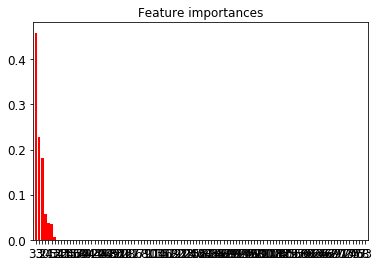

In [58]:
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
importances = adult_tree.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances 
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
